# Social Media Engagement Analysis Using PCA on Facebook Sellers (Thailand) Data 

## Overview
A comprehensive analysis of social media engagement patterns from Facebook Live sellers in Thailand to understand customer interaction behaviors and optimize digital marketing strategies.

## Dataset Information
**You have:**
- **Post-level engagement data**: 2,415 Facebook posts with detailed metrics including reactions, comments, shares, likes, loves, wows, hahas, sads, and angry reactions
- **Content metadata**: Post types (photo, video, link, status), publication timestamps, and status IDs  
- **Multi-dimensional engagement metrics**: 11+ different interaction types representing various emotional responses and engagement levels

## Methodology
**We will:**

1. **Apply Principal Component Analysis (PCA)** to reduce the dimensionality of engagement metrics from 11 features to 2-3 principal components while preserving 80-95% of variance

2. **Implement comprehensive data preprocessing** including standardization, feature engineering (total engagement, emotion ratios), and missing value handling

3. **Perform clustering analysis** on PCA-transformed data to identify distinct engagement segments and behavioral patterns

4. **Create advanced visualizations** including scree plots, bioplots, component loading analysis, and cluster visualization in principal component space

## Goal
**Social media managers and digital marketers can leverage these insights to:**

- Identify high-performing content types and engagement patterns
- Develop targeted content strategies for different audience segments  
- Optimize posting schedules and content formats based on engagement clusters
- Simplify complex multi-dimensional engagement tracking into actionable 2D metrics
- Predict content performance using principal component scores for future posts

## About the dataset 
Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.

## Dataset Structure Preview


| Column | Data Type | Description |
|--------|-----------|-------------|
| `status_id` | Integer | Unique identifier for each post |
| `status_type` | String | Type of post (photo, video, link, status) |
| `status_published` | DateTime | Publication timestamp |
| `num_reactions` | Integer | Total number of reactions |
| `num_comments` | Integer | Number of comments |
| `num_shares` | Integer | Number of shares |
| `num_likes` | Integer | Number of like reactions |
| `num_loves` | Integer | Number of love reactions |
| `num_wows` | Integer | Number of wow reactions |
| `num_hahas` | Integer | Number of laugh reactions |
| `num_sads` | Integer | Number of sad reactions |
| `num_angrys` | Integer | Number of angry reactions |

**Sample Data:**
- **Total Posts**: 2,415
- **Date Range**: 2012-2018
- **Post Types**: Photo (majority), Video, Link, Status
- **Engagement Range**: 0 to 4,000+ reactions per post

This analysis will transform complex multi-dimensional engagement data into actionable business intelligence for Facebook Live sellers in Thailand.


## Importing required Libraries

In [1]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from datetime import datetime
import base64
from IPython.display import display, HTML
import os
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Notebook utility

In [2]:
image_paths = ["PCA_gif.gif", "PCA1.png", "PCA3.png", "PCA4.webp", "PCA5.webp", "PCA6.png"]
image_size = [1000, 700, 400, 600, 500, 500, 500, 500]
images_html = []

mime_map = {
    ".png": "image/png",
    ".jpg": "image/jpeg",
    ".jpeg": "image/jpeg",
    ".gif": "image/gif",
    ".webp": "image/webp"
}

for i, path in enumerate(image_paths):
    ext = os.path.splitext(path)[1].lower()
    mime = mime_map.get(ext, "image/png")

    with open("../img/"+path, "rb") as f:
        data = f.read()
    encoded = base64.b64encode(data).decode("utf-8")

    img_tag = f'<img src="data:{mime};base64,{encoded}" style="display: block; margin-left: auto; margin-right: auto; width: {image_size[i]}px;" /><br>'
    images_html.append(img_tag)


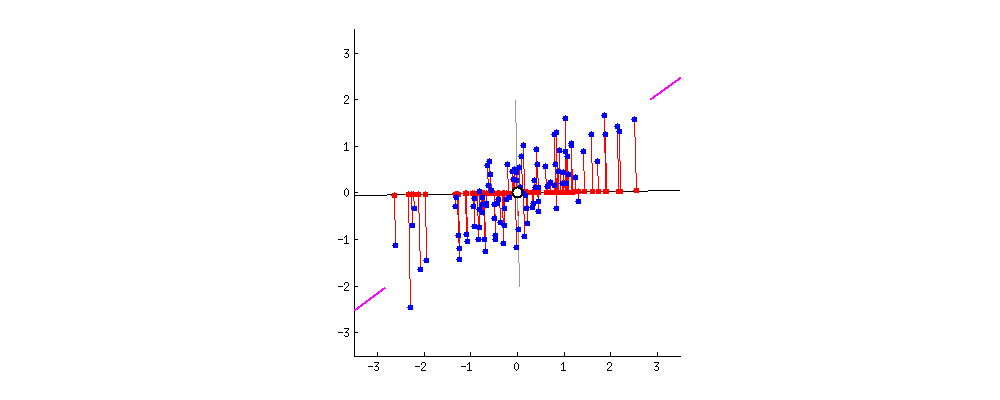

In [3]:
display(HTML(images_html[0]))


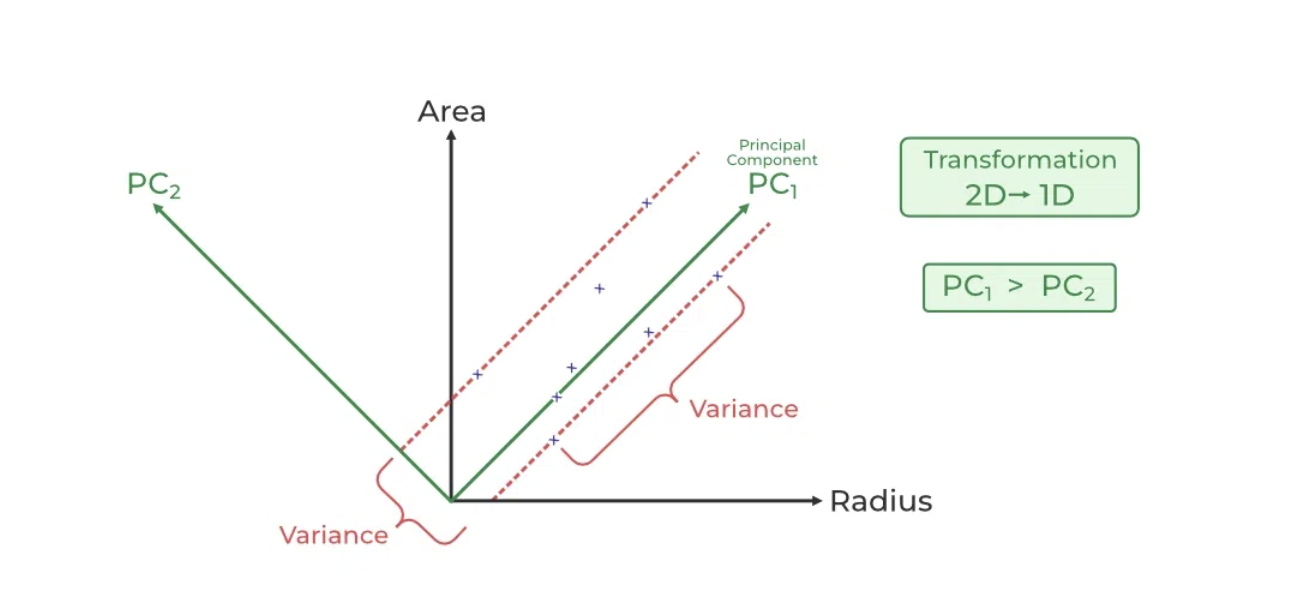

In [4]:
display(HTML(images_html[1]))


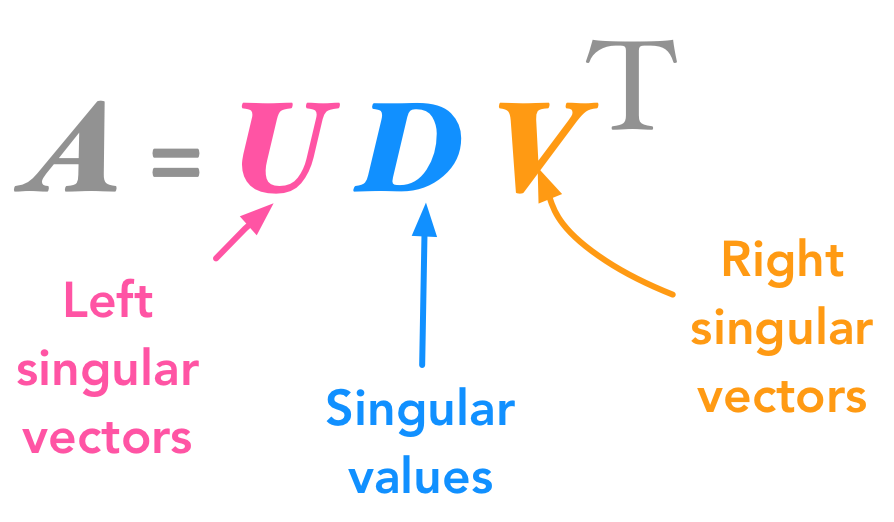

In [5]:
display(HTML(images_html[2]))


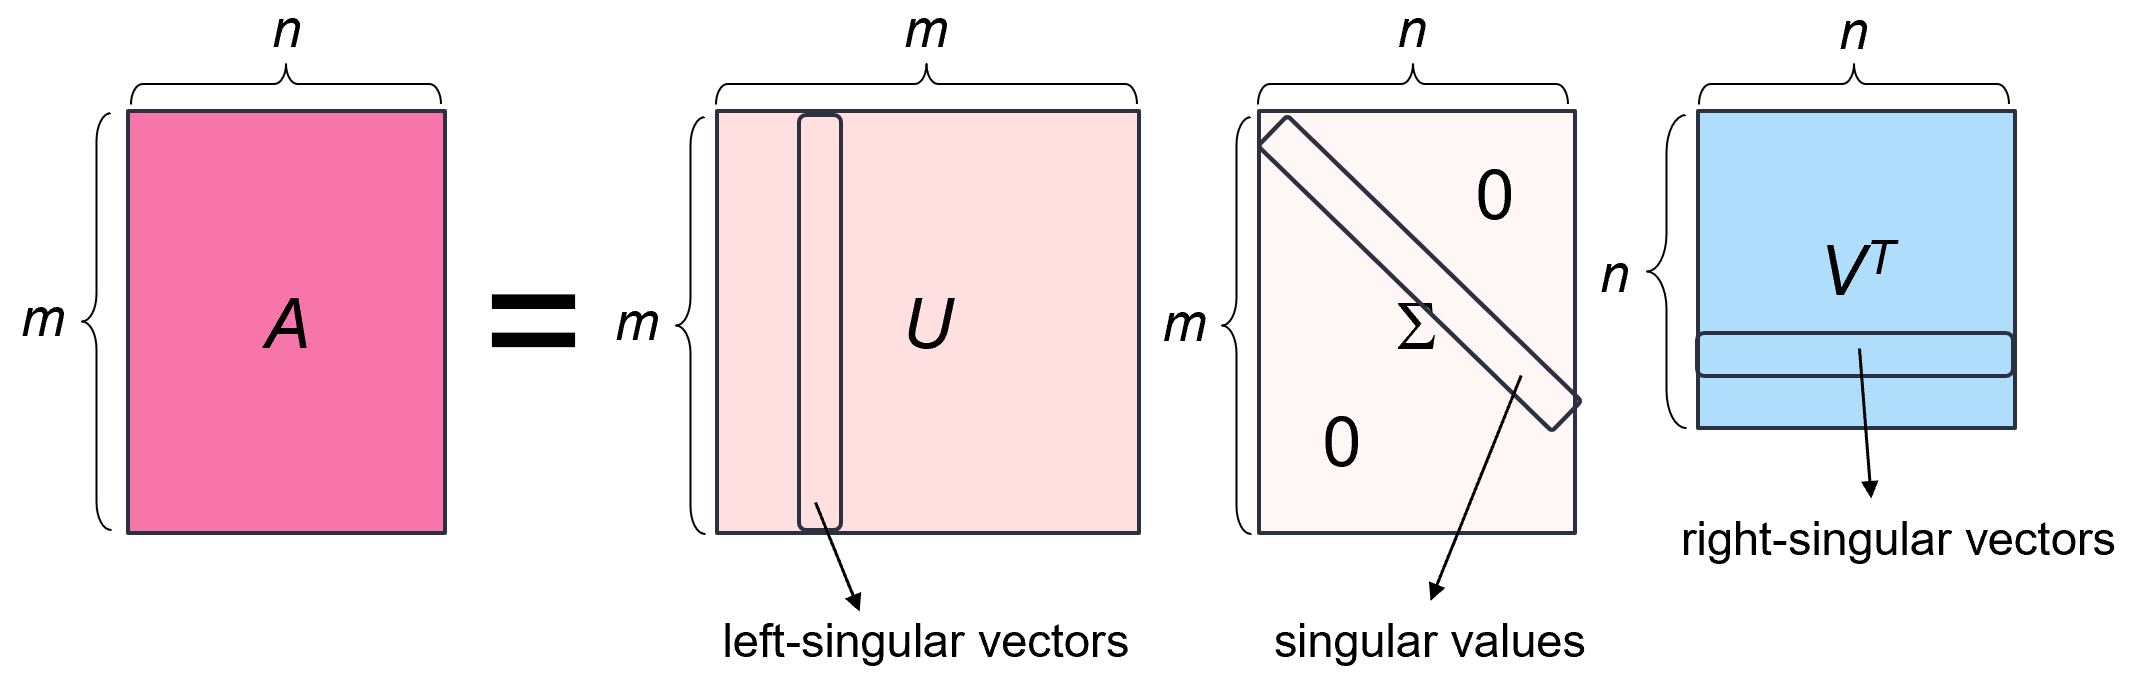

In [6]:
display(HTML(images_html[3]))


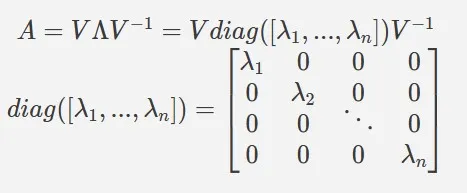

In [7]:
display(HTML(images_html[4]))


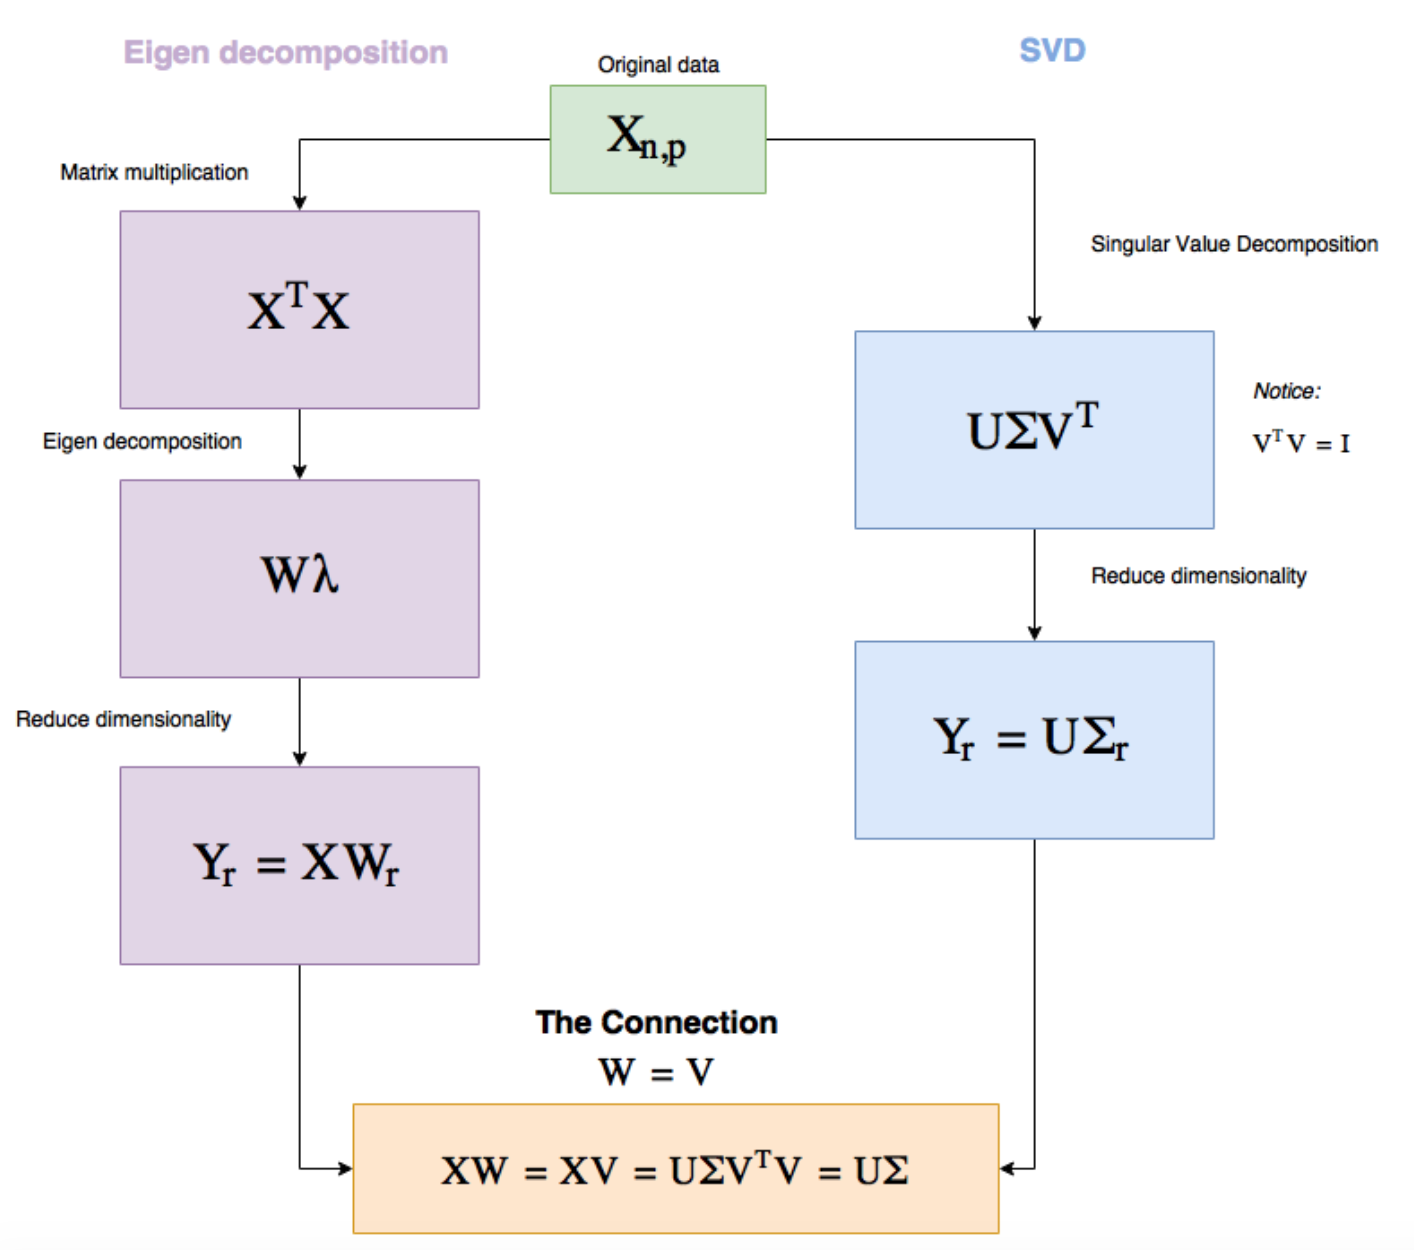

In [8]:
display(HTML(images_html[5]))

## Loading Data and Exploring

In [2]:
# Load the Facebook Live Sellers dataset
df = pd.read_csv('data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total posts analyzed: {len(df):,}")
print(f"Date range: {df['status_published'].min()} to {df['status_published'].max()}")

# Display basic information
print("\n--- First 5 rows ---")
display(df.head())

print("\n--- Dataset Info ---")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")


Dataset shape: (7050, 16)
Total posts analyzed: 7,050
Date range: 1/1/2018 1:39 to 9/9/2017 7:13

--- First 5 rows ---


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN



--- Dataset Info ---
Columns: ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']
Data types:
status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object


## Data Quality Assessment

--- Missing Values ---
Column1    7050
Column2    7050
Column3    7050
Column4    7050
dtype: int64

--- Post Types Distribution ---
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


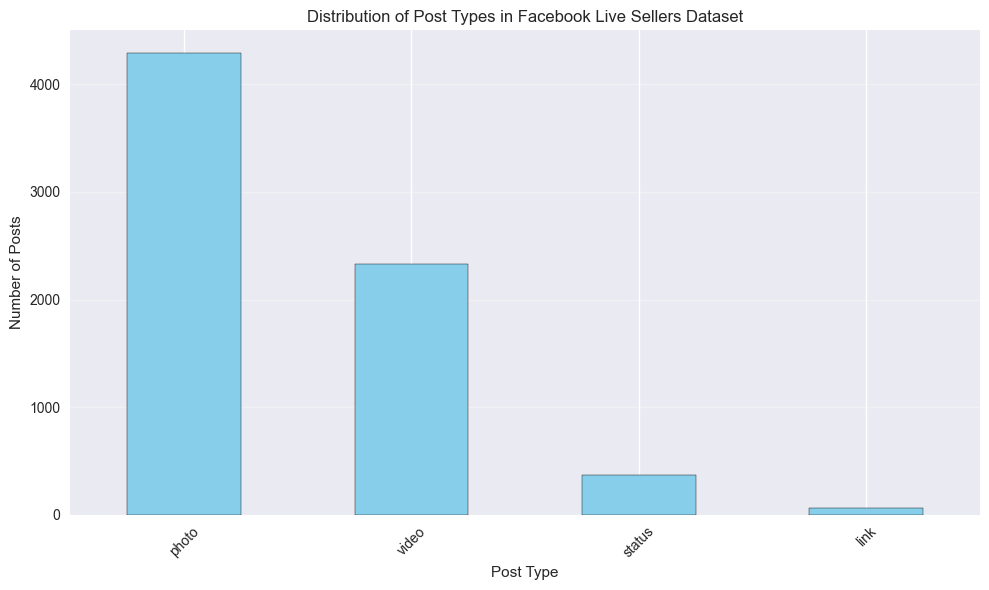


--- Engagement Overview ---
Total engagement metrics available: 9


In [3]:
# Check for missing values and data quality issues
print("--- Missing Values ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✓ No missing values found")

print("\n--- Post Types Distribution ---")
post_type_counts = df['status_type'].value_counts()
print(post_type_counts)

# Visualize post types
plt.figure(figsize=(10, 6))
post_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Post Types in Facebook Live Sellers Dataset')
plt.xlabel('Post Type')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n--- Engagement Overview ---")
engagement_cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 
                  'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
print(f"Total engagement metrics available: {len(engagement_cols)}")


## Understanding Engagement Metrics

### Primary Engagement Metrics:
- **num_reactions**: Total number of all reaction types
- **num_comments**: Number of comments (indicates active engagement)
- **num_shares**: Number of shares (indicates content virality)

### Specific Reaction Types:
- **num_likes**: Traditional likes (basic positive engagement)
- **num_loves**: Love reactions (strong positive emotional response)
- **num_wows**: Wow reactions (surprise/amazement)
- **num_hahas**: Laugh reactions (humor appreciation)
- **num_sads**: Sad reactions (emotional response)
- **num_angrys**: Angry reactions (negative emotional response)

### Why These Metrics Matter:
- Different reactions indicate **different emotional responses**
- **Comments and shares** show deeper engagement than simple likes
- **Reaction diversity** reveals content effectiveness across emotions

## Performing Feature Selection

In [4]:
def select_engagement_features(df):
    """
    Select and engineer engagement features for PCA analysis.
    """
    
    # Define engagement features for analysis
    engagement_features = [
        'num_reactions',   
        'num_comments',     
        'num_shares',       
        'num_likes',        
        'num_loves',        
        'num_wows',         
        'num_hahas',        
        'num_sads',         
        'num_angrys'        
    ]
    
    print(f"Selected {len(engagement_features)} engagement features:")
    for i, feature in enumerate(engagement_features, 1):
        print(f"  {i}. {feature}")
    
    # Extract engagement features
    engagement_df = df[engagement_features].copy()
    
    # Feature engineering: Create additional meaningful metrics
    engagement_df['total_engagement'] = (
        engagement_df['num_comments'] + 
        engagement_df['num_shares'] + 
        engagement_df['num_reactions']
    )
    
    # Calculate emotional engagement ratio (positive vs negative reactions)
    positive_reactions = engagement_df['num_likes'] + engagement_df['num_loves'] + engagement_df['num_wows'] + engagement_df['num_hahas']
    negative_reactions = engagement_df['num_sads'] + engagement_df['num_angrys']
    
    # Avoid division by zero
    engagement_df['emotion_ratio'] = np.where(
        (positive_reactions + negative_reactions) > 0,
        positive_reactions / (positive_reactions + negative_reactions + 1),
        0.5  
    )
    
    print(f"\n Added 'total_engagement' and 'emotion_ratio' as engineered features")
    print(f"Final feature count: {len(engagement_df.columns)}")
    
    return engagement_df

engagement_df = select_engagement_features(df)


Selected 9 engagement features:
  1. num_reactions
  2. num_comments
  3. num_shares
  4. num_likes
  5. num_loves
  6. num_wows
  7. num_hahas
  8. num_sads
  9. num_angrys

 Added 'total_engagement' and 'emotion_ratio' as engineered features
Final feature count: 11


## Exploratory Data Analysis

In [5]:
print("\n--- Descriptive Statistics ---")
display(engagement_df.describe().round(2))

# Identify top performing posts
print("\n--- Top 5 Posts by Total Engagement ---")
top_posts = engagement_df.nlargest(5, 'total_engagement')
for idx, (i, row) in enumerate(top_posts.iterrows(), 1):
    print(f"{idx}. Post {i+1}: {row['total_engagement']:,.0f} total engagement")
    print(f"   Reactions: {row['num_reactions']:,}, Comments: {row['num_comments']:,}, Shares: {row['num_shares']:,}")

# Check for outliers
print(f"\n--- Outlier Detection ---")
Q1 = engagement_df['total_engagement'].quantile(0.25)
Q3 = engagement_df['total_engagement'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outliers = engagement_df[engagement_df['total_engagement'] > outlier_threshold]
print(f"Posts with unusually high engagement (outliers): {len(outliers)} ({len(outliers)/len(engagement_df)*100:.1f}%)")



--- Descriptive Statistics ---


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_engagement,emotion_ratio
count,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00,7050.00
mean,230.12,224.36,40.02,215.04,12.73,1.29,0.70,0.24,0.11,494.50,0.94
std,462.63,889.64,131.60,449.47,39.97,8.72,3.96,1.60,0.73,1152.17,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50
25%,17.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,19.00,0.94
50%,59.50,4.00,0.00,58.00,0.00,0.00,0.00,0.00,0.00,69.00,0.98
75%,219.00,23.00,4.00,184.75,3.00,0.00,0.00,0.00,0.00,419.00,0.99
max,4710.00,20990.00,3424.00,4710.00,657.00,278.00,157.00,51.00,31.00,21708.00,1.00



--- Top 5 Posts by Total Engagement ---
1. Post 499: 21,708 total engagement
   Reactions: 564.0, Comments: 20,990.0, Shares: 154.0
2. Post 481: 19,626 total engagement
   Reactions: 452.0, Comments: 19,013.0, Shares: 161.0
3. Post 6758: 19,025 total engagement
   Reactions: 708.0, Comments: 17,404.0, Shares: 913.0
4. Post 3247: 13,483 total engagement
   Reactions: 624.0, Comments: 12,003.0, Shares: 856.0
5. Post 6763: 12,377 total engagement
   Reactions: 634.0, Comments: 10,960.0, Shares: 783.0

--- Outlier Detection ---
Posts with unusually high engagement (outliers): 972 (13.8%)


## Engagement Distribution Visualization

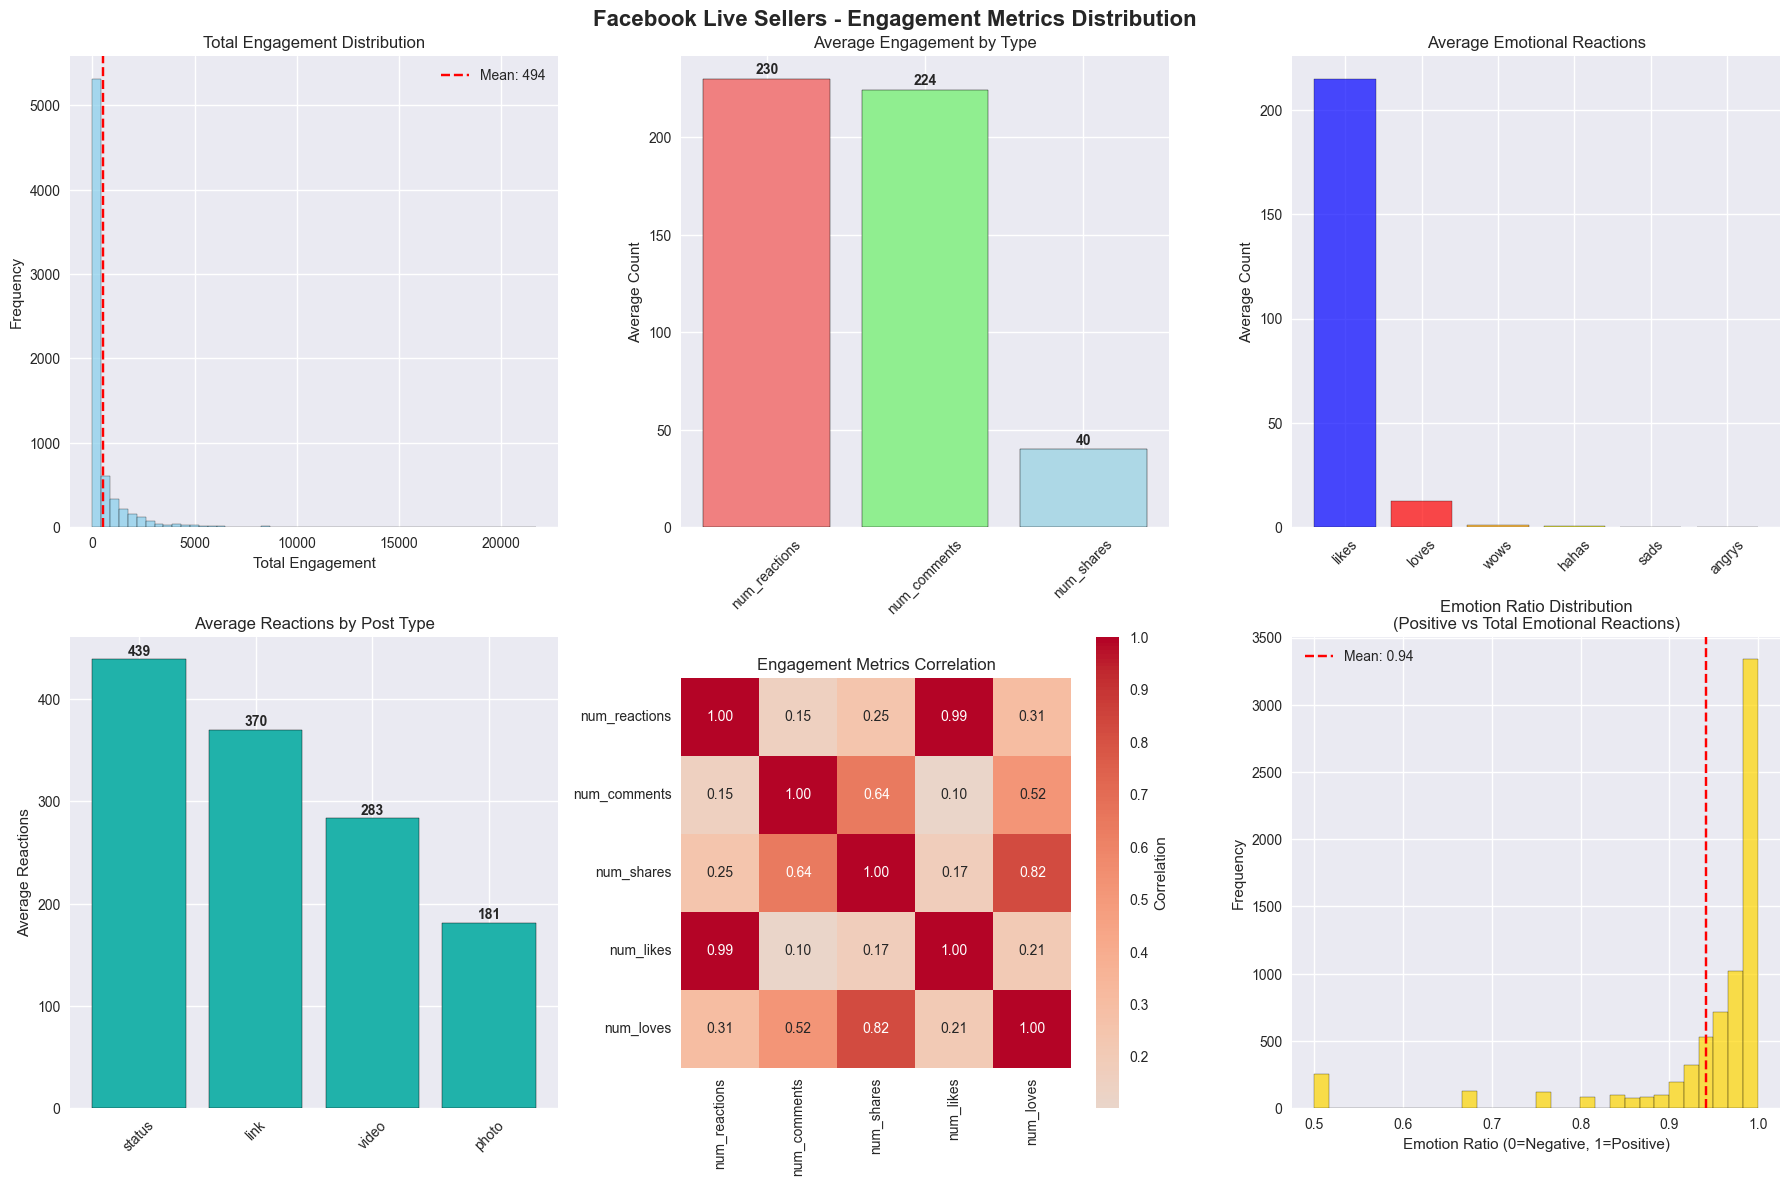

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Facebook Live Sellers - Engagement Metrics Distribution', fontsize=16, fontweight='bold')

# 1. Total Engagement Distribution
ax1 = axes[0, 0]
engagement_df['total_engagement'].hist(bins=50, ax=ax1, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Total Engagement Distribution')
ax1.set_xlabel('Total Engagement')
ax1.set_ylabel('Frequency')
ax1.axvline(engagement_df['total_engagement'].mean(), color='red', linestyle='--', label=f'Mean: {engagement_df["total_engagement"].mean():.0f}')
ax1.legend()

# 2. Reactions vs Comments vs Shares
ax2 = axes[0, 1]
metrics = ['num_reactions', 'num_comments', 'num_shares']
means = [engagement_df[col].mean() for col in metrics]
bars = ax2.bar(metrics, means, color=['lightcoral', 'lightgreen', 'lightblue'], edgecolor='black')
ax2.set_title('Average Engagement by Type')
ax2.set_ylabel('Average Count')
ax2.tick_params(axis='x', rotation=45)
for bar, mean in zip(bars, means):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{mean:.0f}', ha='center', va='bottom', fontweight='bold')

# 3. Emotion Reactions Distribution
ax3 = axes[0, 2]
emotion_cols = ['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
emotion_means = [engagement_df[col].mean() for col in emotion_cols]
colors = ['blue', 'red', 'orange', 'yellow', 'purple', 'darkred']
bars = ax3.bar(range(len(emotion_cols)), emotion_means, color=colors, alpha=0.7, edgecolor='black')
ax3.set_title('Average Emotional Reactions')
ax3.set_ylabel('Average Count')
ax3.set_xticks(range(len(emotion_cols)))
ax3.set_xticklabels([col.replace('num_', '') for col in emotion_cols], rotation=45)

# 4. Engagement by Post Type
ax4 = axes[1, 0]
post_engagement = df.groupby('status_type')['num_reactions'].mean().sort_values(ascending=False)
bars = ax4.bar(post_engagement.index, post_engagement.values, color='lightseagreen', edgecolor='black')
ax4.set_title('Average Reactions by Post Type')
ax4.set_ylabel('Average Reactions')
ax4.tick_params(axis='x', rotation=45)
for bar, val in zip(bars, post_engagement.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{val:.0f}', ha='center', va='bottom', fontweight='bold')

# 5. Correlation Heatmap
ax5 = axes[1, 1]
correlation_matrix = engagement_df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', ax=ax5, cbar_kws={'label': 'Correlation'})
ax5.set_title('Engagement Metrics Correlation')

# 6. Emotion Ratio Distribution
ax6 = axes[1, 2]
engagement_df['emotion_ratio'].hist(bins=30, ax=ax6, color='gold', edgecolor='black', alpha=0.7)
ax6.set_title('Emotion Ratio Distribution\n(Positive vs Total Emotional Reactions)')
ax6.set_xlabel('Emotion Ratio (0=Negative, 1=Positive)')
ax6.set_ylabel('Frequency')
ax6.axvline(engagement_df['emotion_ratio'].mean(), color='red', linestyle='--', 
           label=f'Mean: {engagement_df["emotion_ratio"].mean():.2f}')
ax6.legend()

plt.tight_layout()
plt.show()


## A little more about Standardization

### Why Standardization is Critical for This Dataset

### The Scale Problem in Our Data:
Looking at our Facebook engagement metrics, we can see **vastly different scales**:
- **num_reactions**: Can range from 0 to 4,000+
- **num_loves**: Typically ranges from 0 to 200
- **num_angrys**: Usually ranges from 0 to 10

### What Happens Without Standardization:
- **High-scale features dominate**: `num_reactions` would overwhelm `num_angrys`
- **PCA becomes biased**: Principal components would mainly capture variance in high-scale features
- **Loss of insights**: We'd miss important patterns in smaller-scale but meaningful metrics

### Standardization Solution:
- **Z-score normalization**: `z = (x - μ) / σ`
- **Equal weight**: Each engagement type gets fair representation
- **Better insights**: PCA can capture patterns across all engagement types

## Applying Feature Standardization

In [7]:
def apply_standardization(engagement_df):
    """
    Apply standardization to engagement features before PCA.
    """
    
    # Show scale differences BEFORE standardization
    print("--- Feature Scales (Before Standardization) ---")
    scale_comparison = pd.DataFrame({
        'Feature': engagement_df.columns,
        'Mean': engagement_df.mean().round(2),
        'Std': engagement_df.std().round(2),
        'Min': engagement_df.min(),
        'Max': engagement_df.max(),
        'Range': (engagement_df.max() - engagement_df.min())
    })
    display(scale_comparison)
    
    # Identify features with extreme scale differences
    max_range = scale_comparison['Range'].max()
    min_range = scale_comparison['Range'].min()
    scale_ratio = max_range / min_range
    print(f"\n Scale difference: {scale_ratio:.1f}x between largest and smallest range")
    print(f"This confirms why standardization is essential!")
    
    # Apply standardization
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(engagement_df)
    
    print(f"\n✓ Standardization applied using StandardScaler")
    print(f"  Formula: z = (x - μ) / σ")
    print(f"  Each feature now has mean ≈ 0 and std ≈ 1")
    
    # Verify standardization worked
    scaled_df = pd.DataFrame(scaled_data, columns=engagement_df.columns)
    print(f"\n--- After Standardization (Verification) ---")
    verification = pd.DataFrame({
        'Feature': scaled_df.columns,
        'Mean': scaled_df.mean().round(4),
        'Std': scaled_df.std().round(4),
        'Min': scaled_df.min().round(2),
        'Max': scaled_df.max().round(2)
    })
    display(verification)
    
    return scaled_data, scaler

# Apply standardization
scaled_data, scaler = apply_standardization(engagement_df)
feature_names = engagement_df.columns.tolist()
print(f"\n Data ready for PCA! Shape: {scaled_data.shape}")


--- Feature Scales (Before Standardization) ---


,Feature,Mean,Std,Min,Max,Range
num_reactions,num_reactions,230.12,462.63,0.0,4710.000000,4710.000000
num_comments,num_comments,224.36,889.64,0.0,20990.000000,20990.000000
num_shares,num_shares,40.02,131.60,0.0,3424.000000,3424.000000
num_likes,num_likes,215.04,449.47,0.0,4710.000000,4710.000000
num_loves,num_loves,12.73,39.97,0.0,657.000000,657.000000
num_wows,num_wows,1.29,8.72,0.0,278.000000,278.000000
num_hahas,num_hahas,0.70,3.96,0.0,157.000000,157.000000
num_sads,num_sads,0.24,1.60,0.0,51.000000,51.000000
num_angrys,num_angrys,0.11,0.73,0.0,31.000000,31.000000
total_engagement,total_engagement,494.50,1152.17,0.0,21708.000000,21708.000000



 Scale difference: 43434.4x between largest and smallest range
This confirms why standardization is essential!

✓ Standardization applied using StandardScaler
  Formula: z = (x - μ) / σ
  Each feature now has mean ≈ 0 and std ≈ 1

--- After Standardization (Verification) ---


,Feature,Mean,Std,Min,Max
num_reactions,num_reactions,0.0,1.0001,-0.50,9.68
num_comments,num_comments,0.0,1.0001,-0.25,23.34
num_shares,num_shares,0.0,1.0001,-0.30,25.72
num_likes,num_likes,0.0,1.0001,-0.48,10.00
num_loves,num_loves,0.0,1.0001,-0.32,16.12
num_wows,num_wows,0.0,1.0001,-0.15,31.74
num_hahas,num_hahas,-0.0,1.0001,-0.18,39.50
num_sads,num_sads,-0.0,1.0001,-0.15,31.78
num_angrys,num_angrys,0.0,1.0001,-0.16,42.50
total_engagement,total_engagement,-0.0,1.0001,-0.43,18.41



 Data ready for PCA! Shape: (7050, 11)


## Performing PCA Implementation and Analysis

In [8]:
def perform_comprehensive_pca(scaled_data, feature_names):
    """
    Perform comprehensive PCA analysis on the Facebook engagement data.
    """
    
    # Fit PCA with all components to see full variance explanation
    pca_full = PCA()
    pca_full.fit(scaled_data)
    
    # Calculate explained variance
    explained_var = pca_full.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var)
    
    # Create detailed variance analysis
    print("--- Explained Variance Analysis ---")
    variance_df = pd.DataFrame({
        'Component': [f'PC{i+1}' for i in range(len(explained_var))],
        'Explained_Variance_%': (explained_var * 100).round(2),
        'Cumulative_%': (cumulative_var * 100).round(2),
        'Eigenvalue': pca_full.explained_variance_.round(3)
    })
    display(variance_df)
    
    # Determine optimal number of components
    n_components_80 = np.argmax(cumulative_var >= 0.80) + 1
    n_components_90 = np.argmax(cumulative_var >= 0.90) + 1
    n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
    
    print(f"\n Dimensionality Reduction Potential:")
    print(f"• Original dimensions: {len(feature_names)}")
    print(f"• For 80% variance: {n_components_80} components ({100-n_components_80/len(feature_names)*100:.1f}% reduction)")
    print(f"• For 90% variance: {n_components_90} components ({100-n_components_90/len(feature_names)*100:.1f}% reduction)")
    print(f"• For 95% variance: {n_components_95} components ({100-n_components_95/len(feature_names)*100:.1f}% reduction)")
    
    # Kaiser criterion (eigenvalues > 1)
    kaiser_components = np.sum(pca_full.explained_variance_ > 1)
    print(f"• Kaiser criterion (eigenvalue > 1): {kaiser_components} components")
    
    return pca_full, explained_var, cumulative_var

pca_full, explained_variance, cumulative_variance = perform_comprehensive_pca(scaled_data, feature_names)


--- Explained Variance Analysis ---


,Component,Explained_Variance_%,Cumulative_%,Eigenvalue
0,PC1,38.74,38.74,4.263
1,PC2,16.23,54.98,1.786
2,PC3,9.69,64.67,1.066
3,PC4,8.56,73.23,0.942
4,PC5,7.88,81.11,0.867
5,PC6,7.40,88.51,0.814
6,PC7,6.32,94.83,0.695
7,PC8,3.81,98.64,0.419
8,PC9,1.36,100.00,0.149
9,PC10,0.00,100.00,0.000



 Dimensionality Reduction Potential:
• Original dimensions: 11
• For 80% variance: 5 components (54.5% reduction)
• For 90% variance: 7 components (36.4% reduction)
• For 95% variance: 8 components (27.3% reduction)
• Kaiser criterion (eigenvalue > 1): 3 components


## 2D PCA for Visualization and Interpretation

In [9]:
pca_2d = PCA(n_components=2)
transformed_data_2d = pca_2d.fit_transform(scaled_data)

print(f" Data transformed to 2D")
print(f"• PC1 explains: {pca_2d.explained_variance_ratio_[0]*100:.1f}% of variance")
print(f"• PC2 explains: {pca_2d.explained_variance_ratio_[1]*100:.1f}% of variance")
print(f"• Total captured: {sum(pca_2d.explained_variance_ratio_)*100:.1f}% of variance")

# Create DataFrame with principal component loadings
components_df = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

print(f"\n--- Principal Component Loadings ---")
print("(Shows how much each engagement metric contributes to each PC)")
display(components_df.round(3))

# Interpret the components
print(f"\n--- Component Interpretation ---")
print(f"PC1 - Top contributing features:")
pc1_sorted = components_df['PC1'].abs().sort_values(ascending=False)
for feature, loading in pc1_sorted.head(3).items():
    direction = "positively" if components_df.loc[feature, 'PC1'] > 0 else "negatively"
    print(f"  • {feature}: {loading:.3f} (contributes {direction})")

print(f"\nPC2 - Top contributing features:")
pc2_sorted = components_df['PC2'].abs().sort_values(ascending=False)
for feature, loading in pc2_sorted.head(3).items():
    direction = "positively" if components_df.loc[feature, 'PC2'] > 0 else "negatively"
    print(f"  • {feature}: {loading:.3f} (contributes {direction})")

# Add transformed data to DataFrame for easier handling
pca_results_df = pd.DataFrame(
    transformed_data_2d,
    columns=['PC1', 'PC2']
)

# Add original categorical data
pca_results_df['status_type'] = df['status_type'].values
pca_results_df['original_index'] = df.index

print(f"\n 2D PCA transformation complete!")


 Data transformed to 2D
• PC1 explains: 38.7% of variance
• PC2 explains: 16.2% of variance
• Total captured: 55.0% of variance

--- Principal Component Loadings ---
(Shows how much each engagement metric contributes to each PC)


,PC1,PC2
num_reactions,0.292,0.579
num_comments,0.353,-0.244
num_shares,0.399,-0.233
num_likes,0.257,0.617
num_loves,0.402,-0.201
num_wows,0.250,-0.029
num_hahas,0.266,-0.172
num_sads,0.145,-0.144
num_angrys,0.200,-0.159
total_engagement,0.436,0.017



--- Component Interpretation ---
PC1 - Top contributing features:
  • total_engagement: 0.436 (contributes positively)
  • num_loves: 0.402 (contributes positively)
  • num_shares: 0.399 (contributes positively)

PC2 - Top contributing features:
  • num_likes: 0.617 (contributes positively)
  • num_reactions: 0.579 (contributes positively)
  • num_comments: 0.244 (contributes negatively)

 2D PCA transformation complete!


## PCA Visualizations

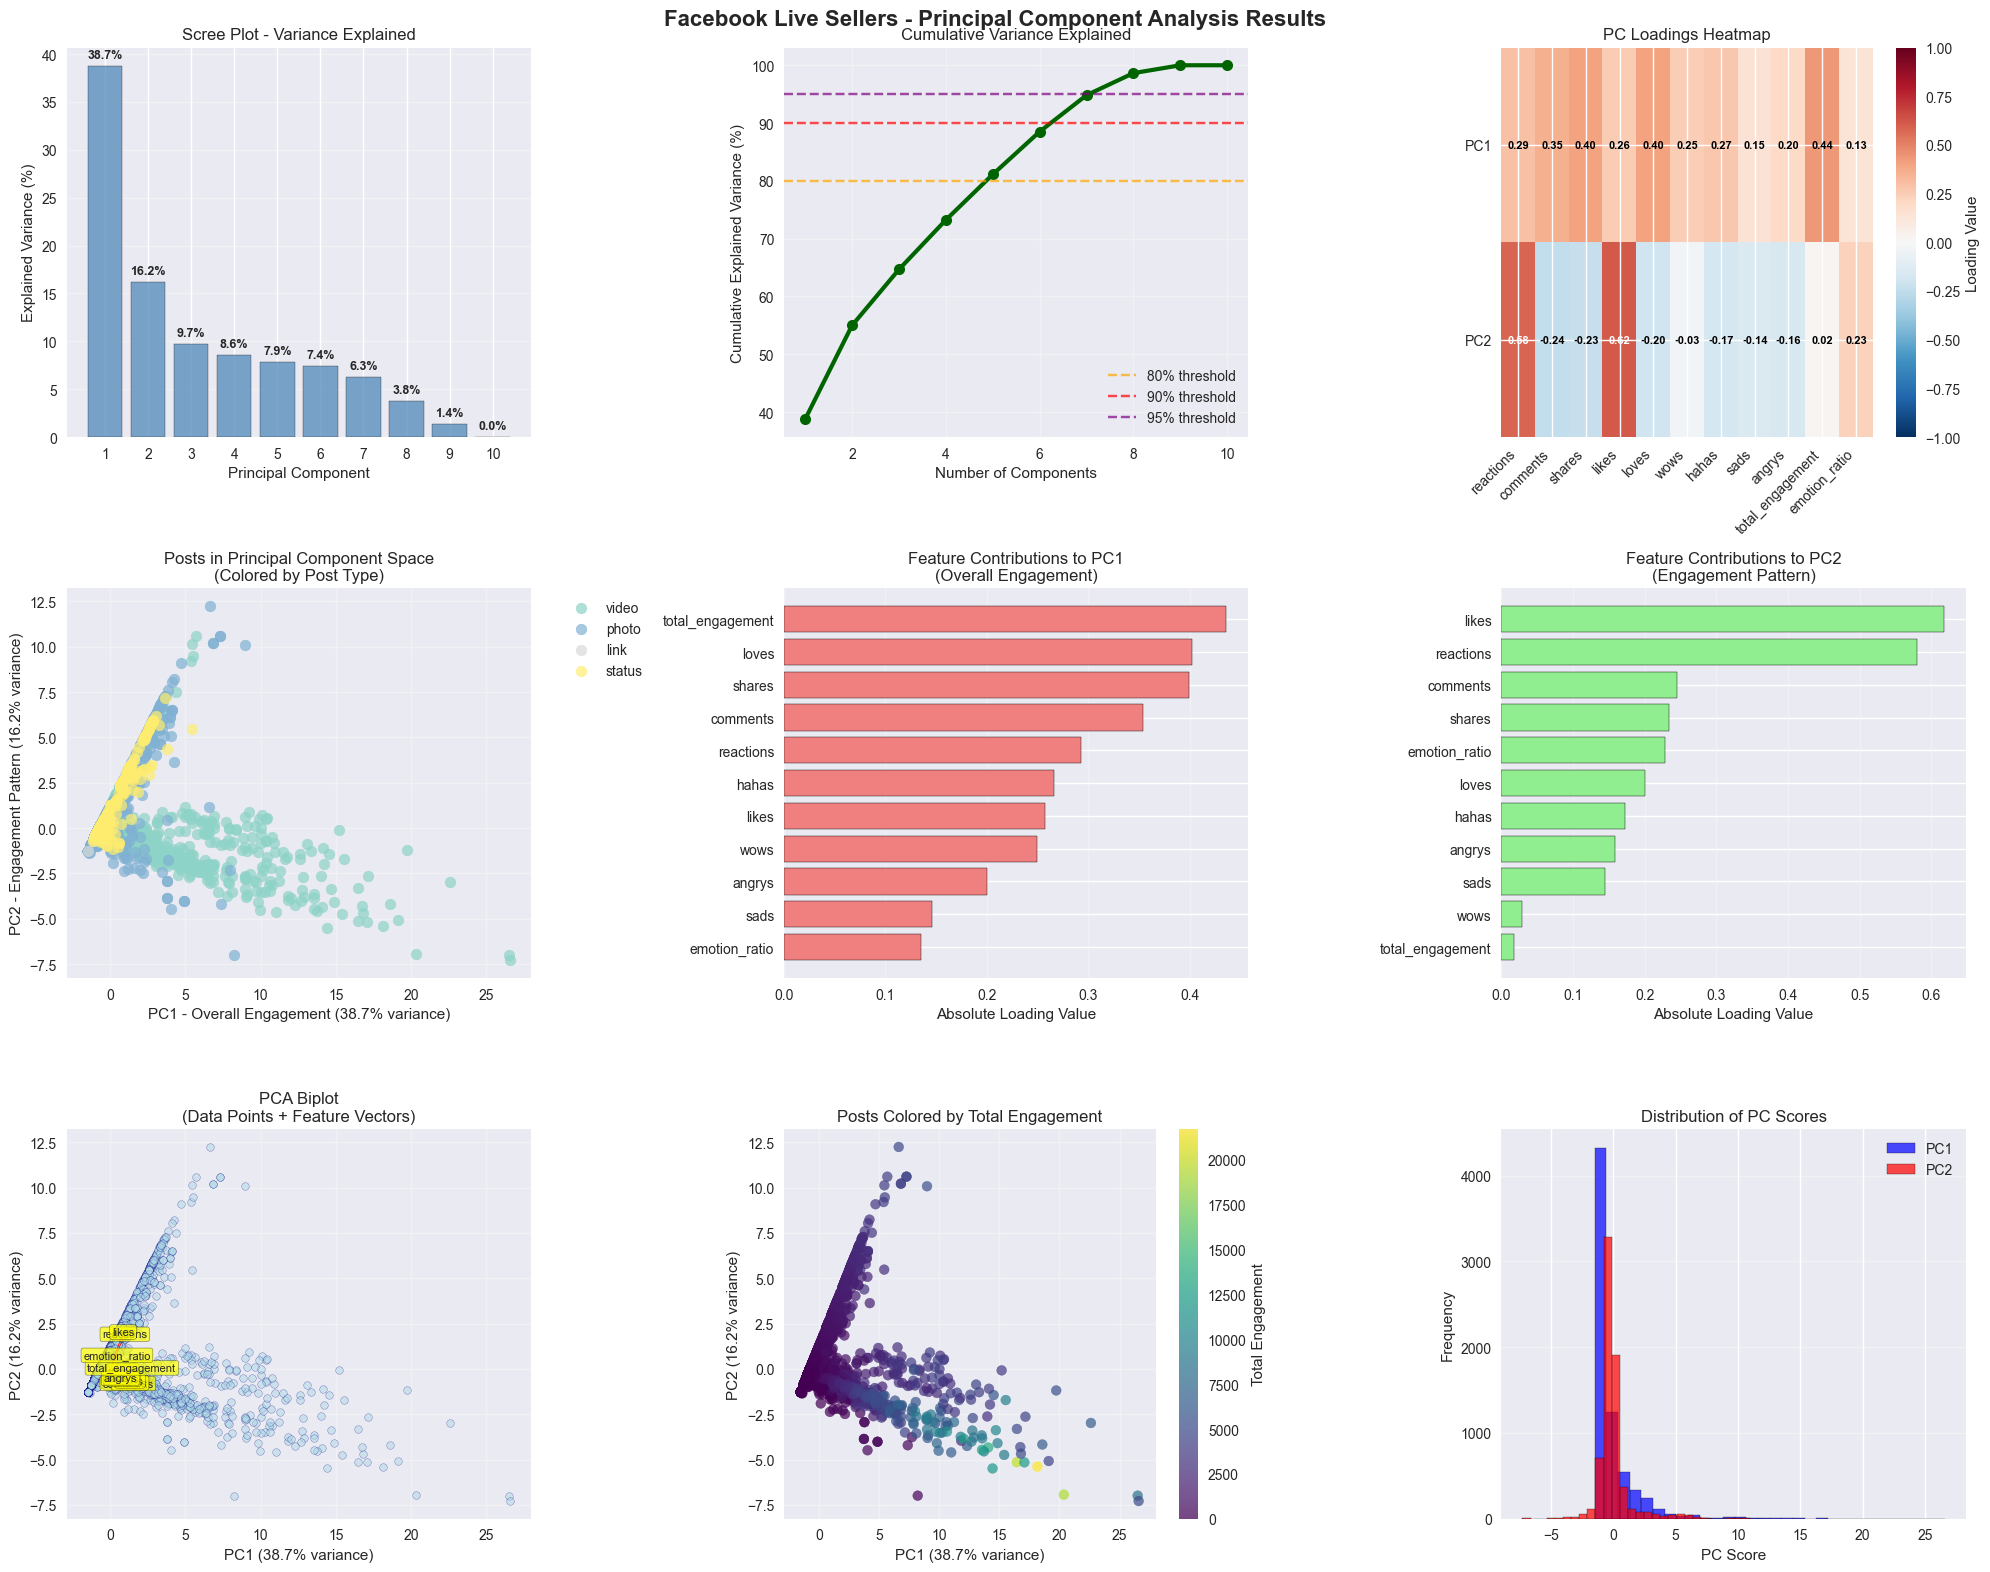

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Facebook Live Sellers - Principal Component Analysis Results', fontsize=16, fontweight='bold')

# 1. Scree Plot (Explained Variance)
ax1 = axes[0, 0]
n_components_show = min(len(explained_variance), 10)
bars = ax1.bar(range(1, n_components_show + 1), explained_variance[:n_components_show] * 100, 
               color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (%)')
ax1.set_title('Scree Plot - Variance Explained')
ax1.set_xticks(range(1, n_components_show + 1))
ax1.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (bar, var) in enumerate(zip(bars, explained_variance[:n_components_show])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{var*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Cumulative Explained Variance
ax2 = axes[0, 1]
ax2.plot(range(1, n_components_show + 1), cumulative_variance[:n_components_show] * 100, 
         'bo-', linewidth=3, markersize=8, color='darkgreen')
ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% threshold')
ax2.axhline(y=90, color='red', linestyle='--', alpha=0.7, label='90% threshold')
ax2.axhline(y=95, color='purple', linestyle='--', alpha=0.7, label='95% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance (%)')
ax2.set_title('Cumulative Variance Explained')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Principal Component Loadings Heatmap
ax3 = axes[0, 2]
im = ax3.imshow(components_df.T.values, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax3.set_xticks(range(len(feature_names)))
ax3.set_xticklabels([name.replace('num_', '') for name in feature_names], rotation=45, ha='right')
ax3.set_yticks(range(2))
ax3.set_yticklabels(['PC1', 'PC2'])
ax3.set_title('PC Loadings Heatmap')

# Add text annotations
for i in range(2):
    for j in range(len(feature_names)):
        text = ax3.text(j, i, f'{components_df.T.iloc[i, j]:.2f}',
                       ha="center", va="center", color="white" if abs(components_df.T.iloc[i, j]) > 0.5 else "black", 
                       fontweight='bold', fontsize=8)

plt.colorbar(im, ax=ax3, label='Loading Value')

# 4. 2D PCA Scatter Plot by Post Type
ax4 = axes[1, 0]
unique_types = pca_results_df['status_type'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(unique_types)))

for i, post_type in enumerate(unique_types):
    mask = pca_results_df['status_type'] == post_type
    ax4.scatter(pca_results_df.loc[mask, 'PC1'], pca_results_df.loc[mask, 'PC2'], 
               c=[colors[i]], label=post_type, alpha=0.7, s=60)

ax4.set_xlabel(f'PC1 - Overall Engagement ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
ax4.set_ylabel(f'PC2 - Engagement Pattern ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
ax4.set_title('Posts in Principal Component Space\n(Colored by Post Type)')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

# 5. PC1 Feature Contributions
ax5 = axes[1, 1]
pc1_contrib = components_df['PC1'].abs().sort_values(ascending=True)
bars = ax5.barh(range(len(pc1_contrib)), pc1_contrib.values, color='lightcoral', edgecolor='black')
ax5.set_yticks(range(len(pc1_contrib)))
ax5.set_yticklabels([name.replace('num_', '') for name in pc1_contrib.index])
ax5.set_xlabel('Absolute Loading Value')
ax5.set_title('Feature Contributions to PC1\n(Overall Engagement)')
ax5.grid(axis='x', alpha=0.3)

# 6. PC2 Feature Contributions
ax6 = axes[1, 2]
pc2_contrib = components_df['PC2'].abs().sort_values(ascending=True)
bars = ax6.barh(range(len(pc2_contrib)), pc2_contrib.values, color='lightgreen', edgecolor='black')
ax6.set_yticks(range(len(pc2_contrib)))
ax6.set_yticklabels([name.replace('num_', '') for name in pc2_contrib.index])
ax6.set_xlabel('Absolute Loading Value')
ax6.set_title('Feature Contributions to PC2\n(Engagement Pattern)')
ax6.grid(axis='x', alpha=0.3)

# 7. Biplot (Features and Data Points)
ax7 = axes[2, 0]
# Plot data points
ax7.scatter(pca_results_df['PC1'], pca_results_df['PC2'], alpha=0.5, s=30, color='lightblue', edgecolor='navy')

# Plot feature vectors
scale_factor = 3  # Scale arrows for visibility
for i, (feature, row) in enumerate(components_df.iterrows()):
    ax7.arrow(0, 0, row['PC1']*scale_factor, row['PC2']*scale_factor, 
             head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.8)
    ax7.text(row['PC1']*scale_factor*1.1, row['PC2']*scale_factor*1.1, 
            feature.replace('num_', ''), fontsize=8, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))

ax7.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
ax7.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
ax7.set_title('PCA Biplot\n(Data Points + Feature Vectors)')
ax7.grid(True, alpha=0.3)

# 8. Engagement Level Distribution in PC Space
ax8 = axes[2, 1]
# Calculate total engagement for color coding
total_engagement = engagement_df['total_engagement'].values
scatter = ax8.scatter(pca_results_df['PC1'], pca_results_df['PC2'], 
                     c=total_engagement, cmap='viridis', alpha=0.7, s=50)
ax8.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
ax8.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
ax8.set_title('Posts Colored by Total Engagement')
plt.colorbar(scatter, ax=ax8, label='Total Engagement')
ax8.grid(True, alpha=0.3)

# 9. PC Score Distributions
ax9 = axes[2, 2]
ax9.hist(pca_results_df['PC1'], bins=30, alpha=0.7, label='PC1', color='blue', edgecolor='black')
ax9.hist(pca_results_df['PC2'], bins=30, alpha=0.7, label='PC2', color='red', edgecolor='black')
ax9.set_xlabel('PC Score')
ax9.set_ylabel('Frequency')
ax9.set_title('Distribution of PC Scores')
ax9.legend()
ax9.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## Performing Clustering Analysis

### Benefits of clustering on PCA components:
- Reduced noise from original 11 dimensions to 2
- Faster clustering computation
- Better visualization of engagement segments
- Principal components capture main engagement patterns



--- Finding Optimal Number of Clusters ---


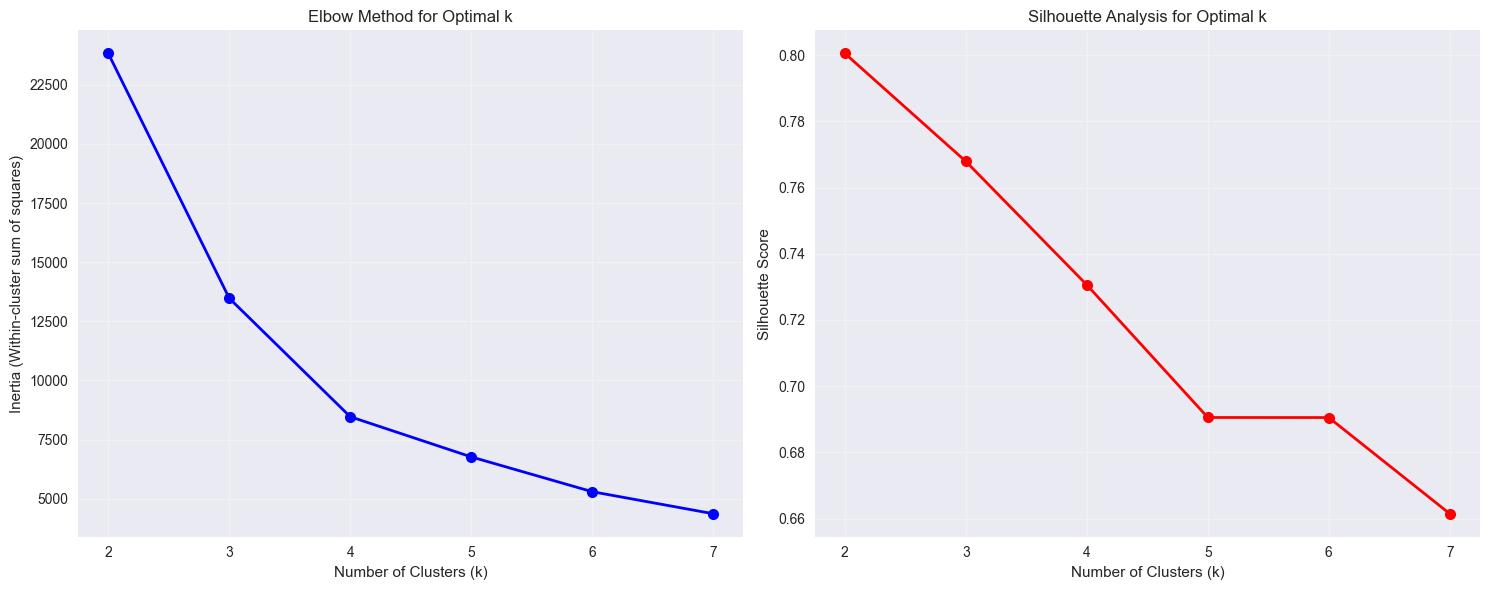

Optimal number of clusters: 2 (highest silhouette score: 0.801)


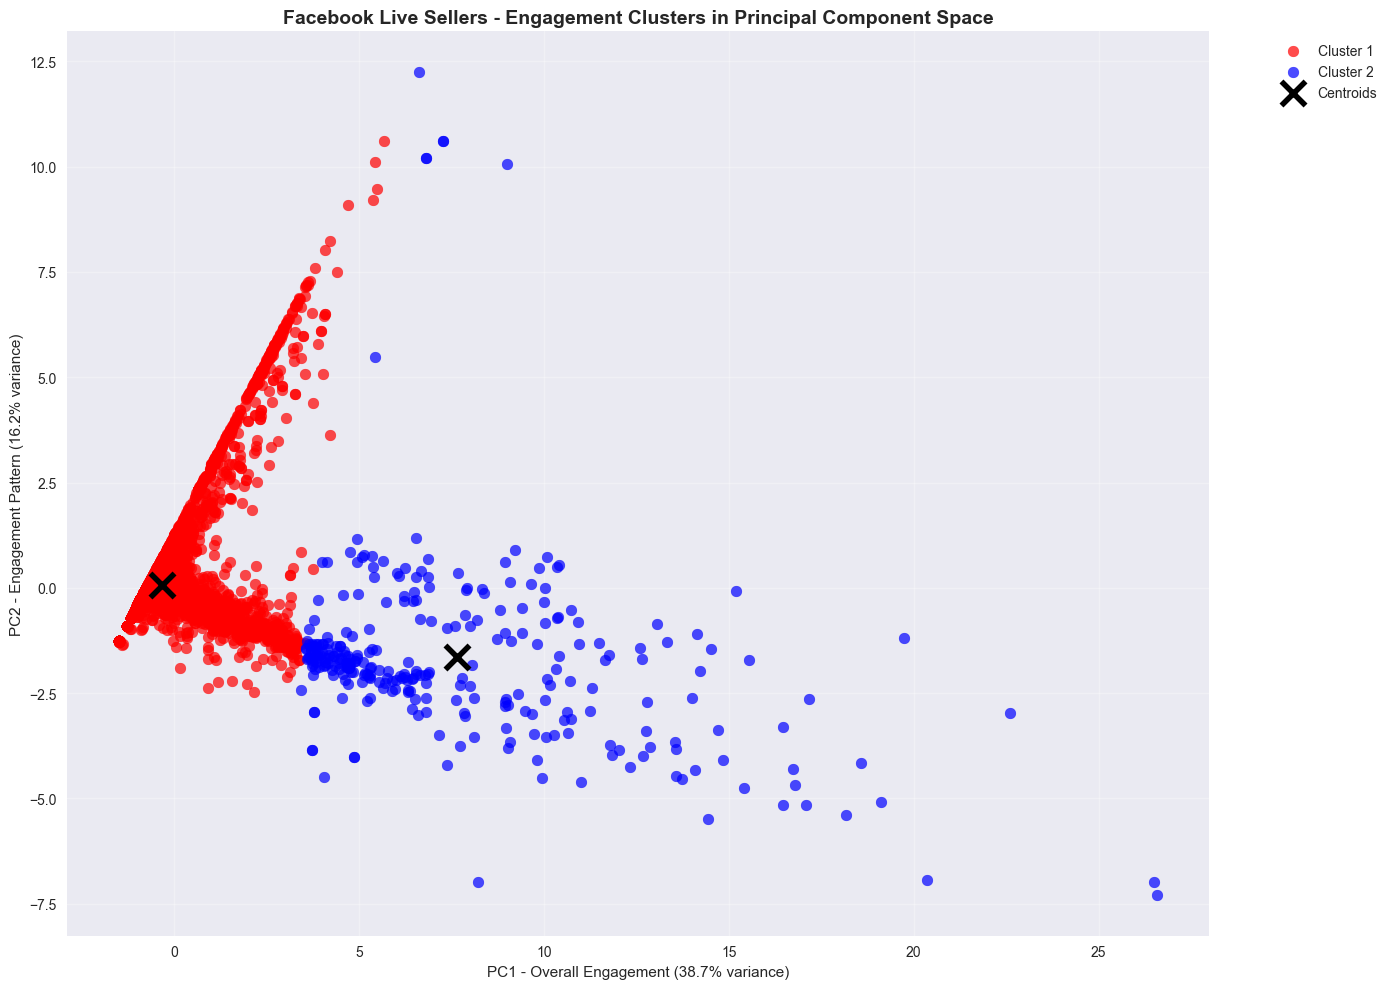


📈 Cluster Analysis:

Cluster 1: 6757 posts (95.8%)
  → Average PC1: -0.33 (Overall Engagement)
  → Average PC2: 0.07 (Engagement Pattern)
  → Average total engagement: 320
  → Most common post type: photo

Cluster 2: 293 posts (4.2%)
  → Average PC1: 7.67 (Overall Engagement)
  → Average PC2: -1.64 (Engagement Pattern)
  → Average total engagement: 4519
  → Most common post type: video


In [11]:
# Determine optimal number of clusters using elbow method
from sklearn.metrics import silhouette_score

print("\n--- Finding Optimal Number of Clusters ---")
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(transformed_data_2d)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(transformed_data_2d, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis for Optimal k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (highest silhouette score: {max(silhouette_scores):.3f})")

# Apply K-means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(transformed_data_2d)

# Add cluster labels to results
pca_results_df['cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(14, 10))

colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
for i in range(optimal_k):
    cluster_mask = cluster_labels == i
    plt.scatter(transformed_data_2d[cluster_mask, 0], 
               transformed_data_2d[cluster_mask, 1],
               c=colors[i], label=f'Cluster {i+1}', alpha=0.7, s=60)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
           c='black', marker='x', s=300, linewidths=4, label='Centroids')

plt.xlabel(f'PC1 - Overall Engagement ({pca_2d.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 - Engagement Pattern ({pca_2d.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.title('Facebook Live Sellers - Engagement Clusters in Principal Component Space', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze cluster characteristics
print(f"\n📈 Cluster Analysis:")
cluster_sizes = np.bincount(cluster_labels)
for i in range(optimal_k):
    percentage = cluster_sizes[i]/len(cluster_labels)*100
    print(f"\nCluster {i+1}: {cluster_sizes[i]} posts ({percentage:.1f}%)")
    
    # Calculate average PC scores for each cluster
    cluster_data = transformed_data_2d[cluster_labels == i]
    avg_pc1 = np.mean(cluster_data[:, 0])
    avg_pc2 = np.mean(cluster_data[:, 1])
    print(f"  → Average PC1: {avg_pc1:.2f} (Overall Engagement)")
    print(f"  → Average PC2: {avg_pc2:.2f} (Engagement Pattern)")
    
    # Analyze original engagement metrics for this cluster
    cluster_indices = pca_results_df[pca_results_df['cluster'] == i]['original_index']
    cluster_engagement = engagement_df.iloc[cluster_indices]
    
    print(f"  → Average total engagement: {cluster_engagement['total_engagement'].mean():.0f}")
    print(f"  → Most common post type: {df.iloc[cluster_indices]['status_type'].mode().iloc[0]}")


## FINAL RESULTS SUMMARY 

### Analysis Summary:
- Total posts analyzed: 7,050
- Original dimensions: 11
- Reduced to: 2 principal components
- Variance preserved: 55.0%
- Dimensionality reduction: 81.8%
- Optimal clusters identified: 2

### Key Insights:
- PC1 represents overall engagement intensity
- PC2 distinguishes engagement patterns/types
- 2 distinct engagement segments identified
- Clear patterns visible in 2D visualization
- Different post types show different engagement patterns